# Simplified version of Neher's Model in R

Neher 2020 has a more complicated model- include migration, different climatic regions and variation in parameters according to the region

python vs r? I like having my own function for the ode as I have in python here. 
Number vs proportions? Both here- as Neher uses proportions

## Numbers 

$\beta_t = \beta_0  (1 + \epsilon \cos (2 \pi (time - \theta)))(1 - containment \times \frac{I^3} {k^3 + I^3}) \\
  infection = \frac{\beta_t  I  S} {N} \\
  \frac{dS}{dt} = \nu  N - infection - \mu S\\
  \frac{dE}{dt}= infection - (\sigma + \mu) E\\
  \frac{dI}{dt} = \sigma  E - (\alpha + \mu + \gamma) I\\
  \frac{dR}{dt} = \gamma I - \mu R $
 

In [2]:
require("epimdr")

Loading required package: epimdr
Loading required package: shiny
Loading required package: deSolve
Loading required package: polspline


In [18]:
plottime <- function(start, time, model, parms) {
  out = ode(
    y = start,
    time = time,
    func = model,
    parms = parms
  )
  Nvec<-out[, "S"] + out[, "E"] + out[, "I"] + out[, "R"]
  out<-cbind( out, Nvec)
  plot(x = out[, "time"],    y = out[, "S"],    ylab = "Number",   xlab = "Time",    type = "l",   xlim=c(min(time), max(time)), ylim=c(0, parms[["N"]]))
  lines(x = out[, "time"], y = out[, "E"], col = "orange")
  lines(x = out[, "time"], y = out[, "I"], col = "red")
  lines(x = out[, "time"], y = out[, "R"], col = "green")
  lines(x = out[, "time"], y = out[, "Nvec"], col = "purple")  
  legend( "bottomright",legend = c("S", "E", "I", "R","N"), col = c("black", "orange", "red", "green","purple"),lty = 1,    cex = 0.8
  )
}

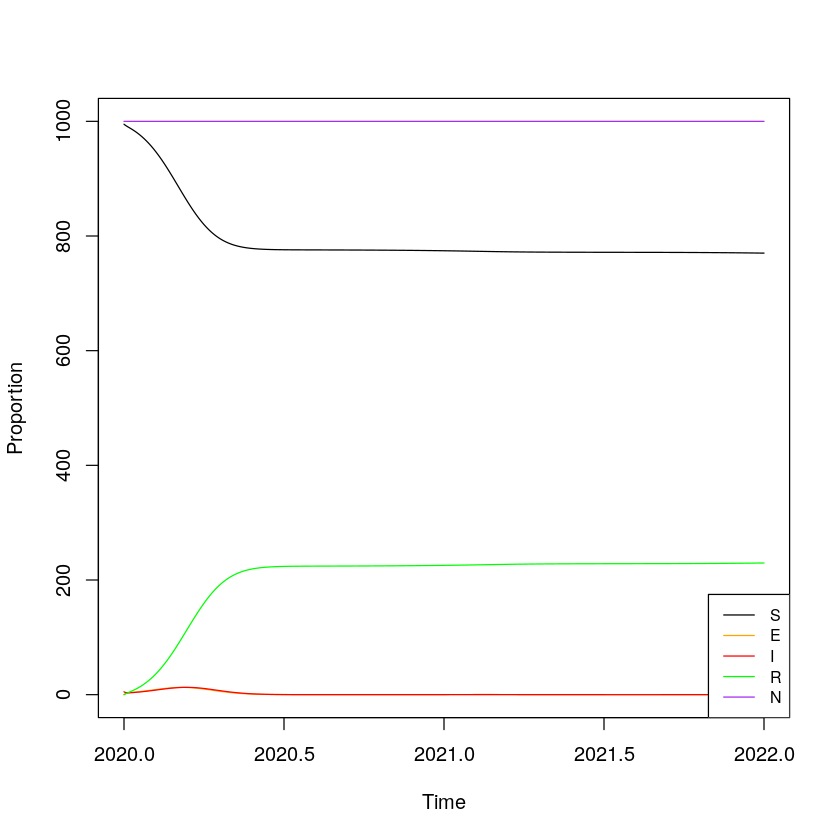

In [13]:
model <- function(time, values, parms) {
  #function where c changes with the climate and humidity at each timepoint
  #initial values
  S <- values[1]
  E <- values[2]
  I <- values[3]
  R <- values[4]
  #parameters
  #kappa0 <- parms[["kappa0"]]
  mu <- parms[["mu"]]
  sigma <- parms[["sigma"]]
  alpha <- parms[["alpha"]]
  gamma <- parms[["gamma"]]
  contact <- parms[["contact"]]
  #temp and humidity are vectors in this model
  f <- parms[["f"]]
  nu <- parms[["nu"]]
  N <- parms[["N"]]
  theta <- parms[["theta"]]
  containment <- parms[["containment"]]
  k <- parms[["k"]]
  epsilon <- parms[["epsilon"]]
  beta0 <- parms[["beta0"]]
  #model
  
  #seir model with varying beta values
  betat<- beta0 * (1 + epsilon * cos (2 * pi * (time - theta))) * (1 - containment * I^3 / (k^3 + I^3))
  infection <- betat * I * S / N 
  dS = nu * N - infection - mu * S
  dE = infection - (sigma + mu) * E
  dI = sigma * E - (alpha + mu + gamma) * I
  dR = gamma * I - mu * R 
 

  list(c(dS, dE, dI, dR))
}


time = seq(2020, 2022, by = 0.001)
#parameters from bjornstad book and guesses- just to test functions work! not sure if this is quite right
parms = list(
  mu = 0,
  alpha = 0.00, 
  f = 2,
  N = 1000,
  nu = 0.0,
    
  theta = 0 ,# where from,
  containment = 0.5 , #where from
  k = 0.03,
  epsilon = 0.4, #where from
  R0 = 2 ,
  beta0 = 2 * 72 , # where nos from
  sigma = 365/5 ,
  gamma = 72 )
                                    
start = c(S = parms[["N"]]-5,
          E = 0.00 ,
          I = 5,
          R = 0)
plottime(
  time = time,
  parms = parms,
  start = start,
  model = model
)


 out = ode(
    y = start,
    time = time,
    func = model,
    parms = parms
  )




### Parameter table - Number
|Parameter|Meaning|Unit|Origin|
|------|------|------|------|
|$\alpha$     |rate of disease induced mortality (per capita?)   |$year^{-1}$|Bjørnstad 2018|
|$\beta$     |transmission rate per infective per day    | $year^{-1}$   |Keeling and Rohani 2007|
|$\beta_0$     |average annual infection rate|$year^{-1}$     |Neher 2020|
|$\gamma$     |recovery rate per year- probably of recovery for an individual per day (reciprocal of infectious period)   |$year^-1$|Keeling and Rohani 2007|
|$\mu$    |natural per capita death rate -not caused by disease|$day^-1$  |Keeling and Rohani 2007|
|$\nu$    |natural per capita birth rate |$year^{-1}$ |Keeling and Rohani 2007|
|$\sigma$     |rate of movement from E to I (reciprocal of latent period)|$year^-1$|Keeling and Rohani 2007|
|$S$     |number of susceptibles    | $individuals^{-1}$   |Keeling and Rohani 2007|
|$E$     |number of exposed |  $individuals^{-1}$    |Keeling and Rohani 2007|
|$I$     |number of infected     |$individuals^{-1}$   |Keeling and Rohani 2007|
|$R$     |number of recovered    |  $individuals^{-1}$  |Keeling and Rohani 2007|
|$temp$  |temperature |degrees c|-|
|$humidity$   |relative humidity|%|-|
|$containment$ |containment parameter||Neher 2020|
|$k$   |inflection point of Hill function||Neher 2020|
|$\epsilon$   |amplitude of seasonal forcing||Neher 2020|
|$\theta$  |time of peak transmissability||Neher 2020|

kappa not used in these models but :|$\kappa$   |average number of contacts per individual per unit time|$year^-1$ |Keeling and Rohani 2007|

units calculated from:  
units of de/dt,ds/st,di/dt, dr/dt $ individuals \times year^{-1}$ 

## Proportion

$\beta_t = \beta_0  (1 + \epsilon \cos (2 \pi (time - \theta)))(1 - containment \times \frac{I^3} {k^3 + I^3}) \\
  infection = \beta_t  I  S\\
  \frac{dS}{dt} = \nu - infection - \mu S\\
  \frac{dE}{dt}= infection - (\sigma + \mu) E\\
  \frac{dI}{dt} = \sigma  E - (\alpha + \mu + \gamma) I\\
  \frac{dR}{dt} = \gamma I - \mu R $
 

here, S, E, I and R represent proportions in these categores  (S=X/N) where X is the true number of susceptibles and N is the population

In [19]:
plottime <- function(start, time, model, parms) {
  out = ode(
    y = start,
    time = time,
    func = model,
    parms = parms
  )
  Nvec<-out[, "S"] + out[, "E"] + out[, "I"] + out[, "R"]
  out<-cbind( out, Nvec)
  plot(x = out[, "time"],    y = out[, "S"],    ylab = "Proportion",   xlab = "Time",    type = "l",   xlim=c(min(time), max(time)),  ylim=c(0, parms[["N"]])
  )
  lines(x = out[, "time"], y = out[, "E"], col = "orange")
  lines(x = out[, "time"], y = out[, "I"], col = "red")
  lines(x = out[, "time"], y = out[, "R"], col = "green")
  lines(x = out[, "time"], y = out[, "Nvec"], col = "purple")  
  legend( "bottomright",legend = c("S", "E", "I", "R","N"), col = c("black", "orange", "red", "green","purple"),lty = 1,    cex = 0.8
  )
}

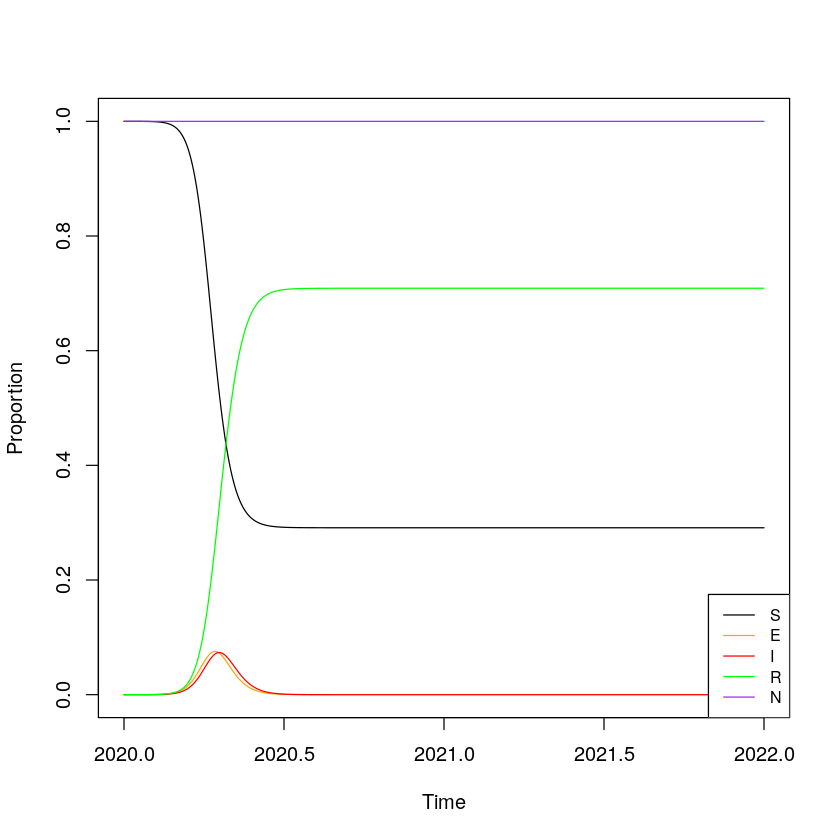

In [20]:
model <- function(time, values, parms) {
  #function where c changes with the climate and humidity at each timepoint
  #initial values
  S <- values[1]
  E <- values[2]
  I <- values[3]
  R <- values[4]
  #parameters
  #kappa0 <- parms[["kappa0"]]
  mu <- parms[["mu"]]
  sigma <- parms[["sigma"]]
  alpha <- parms[["alpha"]]
  gamma <- parms[["gamma"]]
  contact <- parms[["contact"]]
  #temp and humidity are vectors in this model
  f <- parms[["f"]]
  nu <- parms[["nu"]]
  N <- parms[["N"]]
  theta <- parms[["theta"]]
  containment <- parms[["containment"]]
  k <- parms[["k"]]
  epsilon <- parms[["epsilon"]]
  beta0 <- parms[["beta0"]]
  #model
  
  #seir model with varying beta values
  betat<- beta0 * (1 + epsilon * cos (2 * pi * (time - theta))) * (1 - containment * I^3 / (k^3 + I^3))
  infection <- betat * I * S  
  dS = nu - infection - mu * S
  dE = infection - (sigma + mu) * E
  dI = sigma * E - (alpha + mu + gamma) * I
  dR = gamma * I - mu * R 
 

  list(c(dS, dE, dI, dR))
}


time = seq(2020, 2022, by = 0.001)
#parameters from bjornstad book and guesses- just to test functions work! not sure if this is quite right
parms = list(
  mu = 0,
  alpha = 0.0000, 
  f = 2,
  N = 1,
  nu = 0.0,
    
  theta = 0 ,# where from,
  containment = 0.5 , #where from
  k = 0.3,
  epsilon = 0.4, #where from
  R0 = 2 ,
  beta0 = 2 * 72 , # where nos from
  sigma = 365/5 ,
  gamma = 72 )
                                    
start = c(S = 1,
          E = 0.00 ,
          I = 30/1e7,
          R = 0)
plottime(
  time = time,
  parms = parms,
  start = start,
  model = model
)

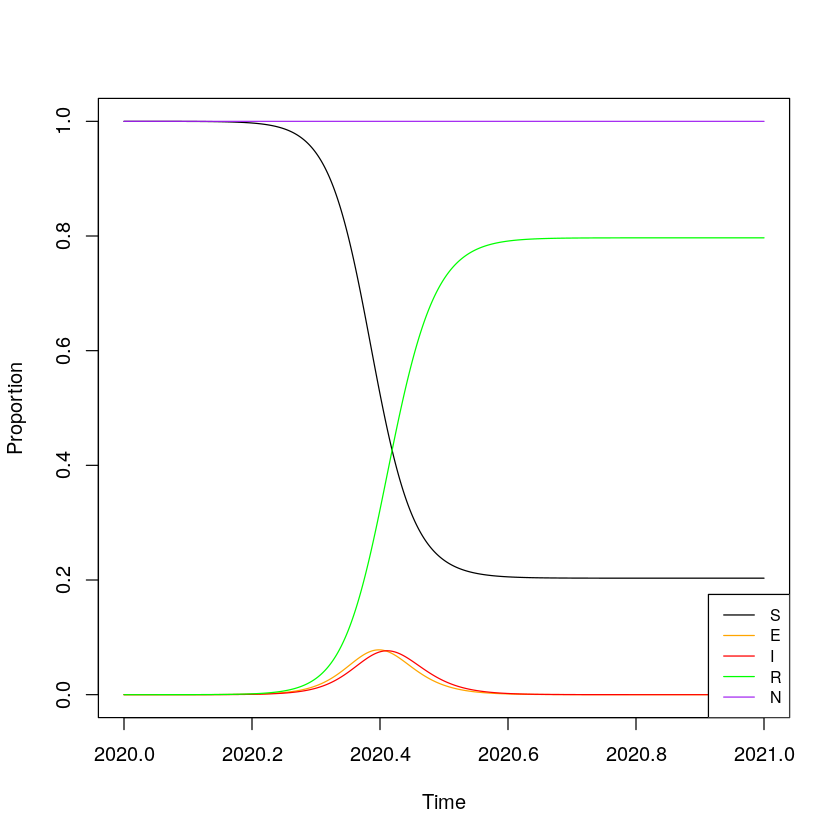

In [21]:
time = seq(2020, 2021, by = 0.001)

parms = list(
  mu = 0,
  alpha = 0.0000, 
  f = 2,
  N = 1,
  nu = 0.0,
    
  theta = 0 ,# where from,
  containment = 0 , #where from
  k = 0.0,
  epsilon = 0, #where from
  R0 = 2 ,
  beta0 = 2 * 72 , # where nos from
  sigma = 365/5 ,
  gamma = 72 )
                                    
start = c(S = 1,
          E = 0.00 ,
          I = 30/1e7,
          R = 0)
plottime(
  time = time,
  parms = parms,
  start = start,
  model = model
)

### Parameter table  - Proportion
|Parameter|Meaning|Unit|Origin|
|------|------|------|------|
|$\alpha$     |rate of disease induced mortality (per capita?)   |$year^{-1}$|Bjørnstad 2018|
|$\beta$     |transmission rate per infective per day    | $year^{-1}$   |Keeling and Rohani 2007|
|$\beta_0$     |average annual infection rate|$year^{-1}$     |Neher 2020|
|$\gamma$     |recovery rate per year- probably of recovery for an individual per day (reciprocal of infectious period)   |$year^-1$|Keeling and Rohani 2007|
|$\mu$    |natural per capita death rate -not caused by disease|$day^-1$  |Keeling and Rohani 2007|
|$\nu$    |natural per capita birth rate |$year^{-1}$ |Keeling and Rohani 2007|
|$\sigma$     |rate of movement from E to I (reciprocal of latent period)|$year^-1$|Keeling and Rohani 2007|
|$S$     |proportion of susceptibles    |    |Keeling and Rohani 2007|
|$E$     |proportion of exposed |     |Keeling and Rohani 2007|
|$I$     |proportion of infected     |  |Keeling and Rohani 2007|
|$R$     |proportion of recovered    |   |Keeling and Rohani 2007|
|$temp$  |temperature |degrees c|-|
|$humidity$   |relative humidity|%|-|
|$containment$ |containment parameter||Neher 2020|
|$k$   |inflection point of Hill function||Neher 2020|
|$\epsilon$   |amplitude of seasonal forcing||Neher 2020|
|$\theta$  |time of peak transmissability||Neher 2020|

kappa not used in these models but :|$\kappa$   |average number of contacts per individual per unit time|$year^-1$ |Keeling and Rohani 2007|

units calculated from:  
units of de/dt,ds/st,di/dt, dr/dt proportional change $\times year^{-1}$  

